## Машинное обучение, ВМК МГУ

## Практическое задание 1

### Общая информация
Дата выдачи: 24 сентября 2018 г.

Дедлайн: 22 октября 2018 г.

### О задании

В этом задании вы:
- обучите линейную регрессию, познакомитесь с метриками качества в задачах регресии
- реализуете логистическую регрессию и её обучение градиентным спуском
- настроите метод опорных векторов, визуализируете опорные вектора
- познакомитесь с калибровочными кривыми и сравните вероятности, выдаваемые логистической регрессией и методом опорных векторов
- изучите методы работы с категориальными переменными
- в качестве бонуса попробуете библиотеку vowpal wabbit.


### Оценивание и штрафы
Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса).

Неэффективная реализация кода может негативно отразиться на оценке.

In [1]:
%pylab inline
import pandas as pd

from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)

Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

В этой части мы кратко познакомимся с линейной регрессией.

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3.

In [2]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=318)

/home/alexmal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


__Задание 1.__ Обучение линейной регрессии.

Обучите линейную регрессию с $L_1$ (Lasso, http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) и $L_2$ (Ridge, http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

In [3]:
# Lasso
lasso_model = linear_model.Lasso()
lasso_model.fit(X_train, y_train)

# Ridge
ridge_model = linear_model.Ridge()
ridge_model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [4]:
def count_near_zeros(model, alpha = 0.01):
    model_coef = model.coef_
    len_coef = len(model.coef_)
    true_zeros = np.count_nonzero(model_coef==0)
    near_zeros = len(model_coef[abs(model_coef) <= alpha])
    print("The frequency of zeros = {}".format(true_zeros / len_coef))
    print("The frequency of the elements of [-{a}, {a}] = {b}".format(a=alpha, b=near_zeros / len_coef))    

In [5]:
print("="*10, "LASSO", "="*10)
count_near_zeros(lasso_model)
print("="*10, "RIDGE", "="*10)
count_near_zeros(ridge_model)

========== LASSO ==========
The frequency of zeros = 0.8
The frequency of the elements of [-0.01, 0.01] = 0.8
========== RIDGE ==========
The frequency of zeros = 0.0
The frequency of the elements of [-0.01, 0.01] = 0.0


Text(0.5, 0, 'lalpha')

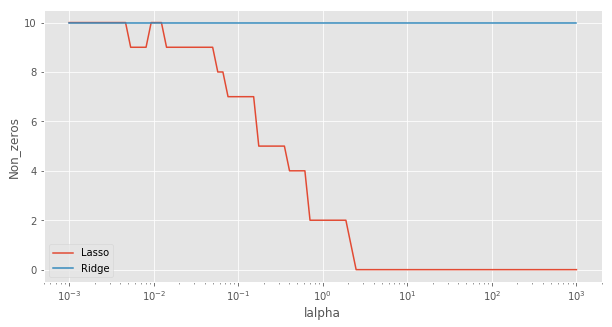

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
non_zeros_losso = []
non_zeros_ridge = []
alpha_list = []


for i, alpha in enumerate(np.logspace(-3, 3, num=100)):
    lasso_model = linear_model.Lasso(alpha = alpha).fit(X_train, y_train)
    ridge_model = linear_model.Ridge(alpha = alpha).fit(X_train, y_train)
    non_zeros_losso.append(np.count_nonzero(lasso_model.coef_))
    non_zeros_ridge.append(np.count_nonzero(ridge_model.coef_))
    alpha_list.append(alpha)
ax.plot(np.logspace(-3, 3, num=100), non_zeros_losso, label = "Lasso")
ax.plot(np.logspace(-3, 3, num=100), non_zeros_ridge, label = "Ridge")
ax.legend()
ax.set_xscale('log')
ax.set_ylabel("Non_zeros")
ax.set_xlabel("lalpha")

In [7]:
# Результаты согласуются: L1 при увеличчении alpha занулила коэффиценты, L2 же не зануляет их

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from IPython.display import display, Math, Latex


In [9]:
def rmse(y_true, y_pred):
    return (mean_squared_error(y_true, y_pred))**0.5

def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def r2(y_true, y_pred):
    return r2_score(y_true, y_pred)

In [10]:
ridge_model = linear_model.Ridge().fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
display(Math(r'RMSE = {}'.format(rmse(y_test, y_pred))))
display(Math(r'MAE = {}'.format( mae(y_test, y_pred))))
display(Math(r'R^2 = {}'.format(r2(y_test, y_pred))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

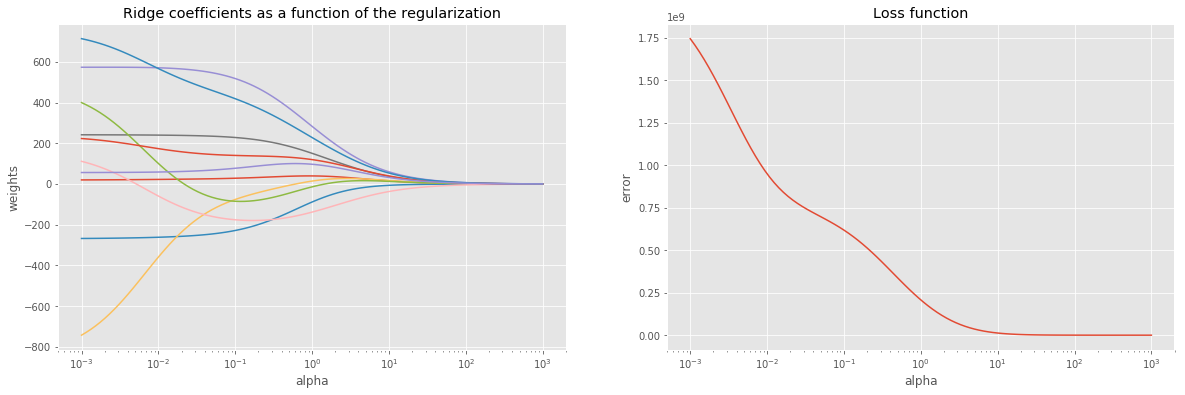

In [11]:
coefs = []
errors = []
clf = linear_model.Ridge()
alphas = np.logspace(-3, 3, 100)

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X_train, y_train)
    w = clf.coef_
    coefs.append(w)
    errors.append(mean_squared_error(y_train, X_train.dot(w)) + alpha*np.square(w).sum())

# Display results
plt.figure(figsize=(20, 6))
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Loss function')
plt.axis('tight')

plt.show()


In [12]:
parameters = {'alpha': np.logspace(-3, 3, 100)}
scoring = {'rmse': make_scorer(rmse, greater_is_better=False),
           'mae': make_scorer(mae, greater_is_better=False), 
           'r2': make_scorer(r2)}
alpha_dict = {}

In [13]:
for scor in scoring:
    gs = GridSearchCV(linear_model.Ridge(), parameters, scoring = scoring[scor] ,cv = 3)
    gs.fit(X_train, y_train)
    alpha_dict[scor] = gs.best_params_

In [14]:
alpha_dict

{'rmse': {'alpha': 0.002009233002565048},
 'mae': {'alpha': 0.001},
 'r2': {'alpha': 0.001747528400007683}}

In [15]:
model = linear_model.Ridge()
ridge_model_rmse = model.set_params(**alpha_dict['rmse']).fit(X_train, y_train)
ridge_model_mae = model.set_params(**alpha_dict['mae']).fit(X_train, y_train)
ridge_model_r2 = model.set_params(**alpha_dict['r2']).fit(X_train, y_train)

y_pred_rmse = ridge_model_rmse.predict(X_test)
y_pred_mae = ridge_model_mae.predict(X_test)
y_pred_r2 = ridge_model_r2.predict(X_test)

rmse_error_old = rmse(y_test, y_pred_rmse)
display(Math(r'RMSE = {}'.format(rmse(y_test, y_pred_rmse))))
display(Math(r'MAE = {}'.format( mae( y_test, y_pred_mae))))
display(Math(r'R^2 = {}'.format(r2(y_test, y_pred_r2))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [16]:
# Качество незначительно увеличилось

__Задание 2.__ Поиск объектов-выбросов

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

In [17]:
from sklearn.model_selection import cross_val_predict, cross_val_score

In [18]:
ridge = linear_model.Ridge(**alpha_dict['rmse'])

predicted = cross_val_predict(ridge, X_train, y_train, cv=5)


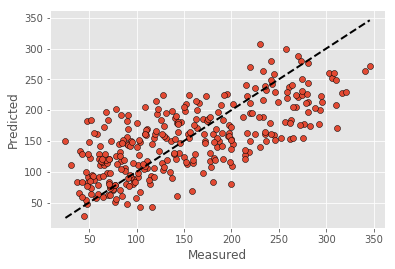

In [19]:
# Нашел решил построить, ничего сразу не увидел
fig, ax = plt.subplots()
ax.scatter(y_train, predicted, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

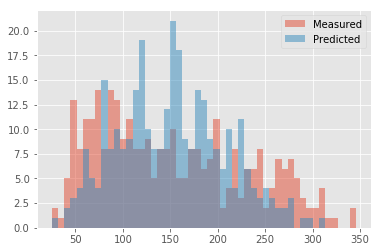

In [20]:
# Похоже, что значение около 350 выброс и в центре 
bins = np.linspace(y_train.min(), y_train.max(), 50)
pyplot.hist(y_train, bins, alpha=0.5, label='Measured')
pyplot.hist(predicted, bins, alpha=0.5, label='Predicted')
pyplot.legend(loc='upper right')
pyplot.show()

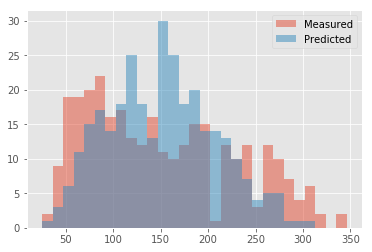

In [21]:
bins = np.linspace(y_train.min(), y_train.max(), 30)
pyplot.hist(y_train, bins, alpha=0.5, label='Measured')
pyplot.hist(predicted, bins, alpha=0.5, label='Predicted')
pyplot.legend(loc='upper right')
pyplot.show()

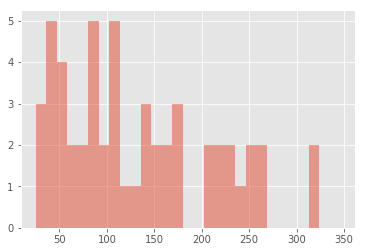

In [22]:
# Видно что сильно ошибаемся в предскзааниях значений из первой половины
error = (y_train - predicted)**2
pyplot.hist(error, bins, alpha=0.5)
pyplot.show()

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

In [23]:
drop = np.argwhere(y_train >= bins[26])
drop = np.append(drop, np.argwhere(y_train <= bins[0]))
drop = np.append(drop, np.argwhere((y_train <= bins[16]) & (y_train > bins[15])))


X_train_new = np.delete(X_train, drop, axis=0)
y_train_new = np.delete(y_train, drop)
ridge = linear_model.Ridge(**alpha_dict['rmse']).fit(X_train_new, y_train_new)
y_pred_rmse = ridge.predict(X_test)
rmse_error_new = rmse(y_test, y_pred_rmse)
print("Улучшение RMSE = ", rmse_error_old - rmse_error_new)

Улучшение RMSE =  0.37452825298154124


## Часть 2. Логистическая регрессия

В этой части мы будем реализовывать один из самых простых бинарных классификаторов — логистическую регрессию и её обучение с помощью обычного (полного) и стохастического градиентных спусков.

Если кратко, то обучение логистической регрессии с $L_2$-регуляризацией можно записать следующим образом:

$$
Q(w, X) = \frac{1}{l} \sum_{i=1}^{l} \log (1 + \exp(- y_i \langle w, x_i \rangle )) + \frac{\lambda_2}{2} \lVert w \rVert _2^2 \to \min_w
$$

Считаем, что $y_i \in \{-1, +1\}$, а нулевым признаком сделан единичный (то есть $w_0$ соответствует свободному члену). Искать $w$ будем с помощью градиентного спуска:

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla_w Q(w, X)
$$

В случае полного градиентного спуска $\nabla_w Q(w, X)$ считается напрямую (как есть, то есть, используя все объекты выборки). В случае стохастического градиентного спуска $\nabla_w Q(w, X) \approx \nabla_w q_{i_k} (w)$, где $i_k$ — случайно выбранный номер слагаемого из функционала (регуляризатор можно внести в сумму, предварительно умножив и разделив на $l$). Длину шага $\alpha > 0$ в рамках данного задания предлагается брать равной некоторой малой константе.

Градиент по объекту $x_i$ считается по следующей формуле:

$$
\nabla_w Q(w, x_i) = - \frac{y_i x_i}{1 + \exp(y_i \langle w, x_i \rangle)} + \lambda_2 w
$$

На самом деле неправильно регуляризировать свободный член $w_0$ (то есть при добавлении градиента для $w_0$ не надо учитывать слагаемое с $\lambda_2$). Но в рамках этого задания мы не обращаем на это внимания и работаем со всеми вектором весов одинаково. 

В качестве критерия останова необходимо использовать (одновременно):
- проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$) — параметр tolerance
- достижение максимального числа итераций (например, 10000) — параметр max\_iter.

Инициализировать веса можно случайным образом или нулевым вектором.

Вероятность принадлежности объекта $x$ классу $+1$ вычисляется следующим образом:

$$
P(y = +1 | x) = \frac{1}{1 + \exp(- \langle w, x \rangle )}
$$

Не забывайте, что матрицу объекты-признаки $X$ необходимо предварительно нормировать (то есть привести каждый признак к одному и тому же масштабу одним из 2 способов, разобранных на лекциях). Для этого можно воспользоваться StandardScaler или сделать это вручную.

В логистической регрессии также можно использовать $L_1$-регуляризацию. Тогда в функцию потерь добавится слагаемое $\lambda_1 \lVert w \rVert _1$. В формуле для вычисления градиента фукнции потерь по вектору коэффициентов это слагаемое будет соответствовать $\lambda_1 sgn(w)$, где $sgn$ — вычисление знака числа, применяемое к вектору коэффициентов поэлементо.

__Задание 1.__ Реализация обучения и применения логистической регресии c $L_2$-регуляризацией. 

Используйте для этого указанные ниже прототипы. Для эффективности все вычисления производите в векторизованной форме без циклов (кроме самих итераций градиентного спуска). Сгенерируйте с помощью функции make\_classification из модуля sklearn.datasets небольшую выборку для тестирования и исследования (выборка не должна быть слишком простой для классификации; также не забудьте проверить, что метки объектов из необходимого нам множества). Постройте следующие графики (для полного и стохастического градиентного спуска на одном графике):
- функции потерь от номера итерации обучения
- затраченного времени от номера итерации обучения

Возьмите параметр регуляризации $\lambda_2=1$, точность $tolerance=10^{-6}$, максимальное число итераций $max\_iter=1000$. Подберите оптимальную на ваш взгляд величину шага градиентного спуска. 

Сделайте выводы о том, чем различается на практике обучение с помощью стохастического градиентного спуска по сравнению с полным градиентным спуском.

В этом задании не обращайте внимания на $\lambda_1$, соответствующий $L_1$-регуляризации.

Для численной устойчивости вам могут быть полезны функции: scipy.special.expit и numpy.logaddexp.

In [24]:
from sklearn.utils import shuffle
from scipy.special import expit
from sklearn.datasets import make_classification
from tqdm import tqdm
import time

In [25]:
class LogReg(BaseEstimator):
    def __init__(self, C = 1, lambda_1=0.0, lambda_2=1.0, gd_type=None, 
                 tolerance=1e-4, max_iter=1000, w0=None, alpha=1e-3, loss_history = False, minibatch_size = 32, time_history = False, threshold = 0.5, shuffle=True):
        """
        lambda_1: L1 regularization param
        lambda_2: L2 regularization param
        gd_type: 'full' or 'stochastic'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) - init weights
        alpha: learning rate
        """
        self.lambda_1 = lambda_1
        self.lambda_2 = lambda_2
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.minibatch_size = minibatch_size
        self.loss_history = loss_history
        self.time_history = time_history
        self.threshold = threshold
        self.shuffle = shuffle
        
        

    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        N = y.size
        # добавляем нулевой столбец из единиц для обучения w0
        
        X_ = np.concatenate((np.ones(N).reshape(-1, 1), X), axis=1)
        if (self.w0 is None):
            self.w0 = np.random.rand(X_.shape[1])
        self.weights = self.w0
        self.costs = np.zeros(self.max_iter)
        self.times = np.zeros(self.max_iter)
        

        # преобразуем классы 0,1 в -1,1
        y_ = y
        classes = np.unique(y)
        y_ = np.ones(N)
        y_[y == classes[0]] = -1
        
        cost_prev = 0
        learning_rate = self.alpha
        if (self.gd_type == 'stochastic'):
            self.minibatch_size = 1
        elif (self.gd_type == "full"):
            self.minibatch_size = X_.shape[0]
            
        for epoch in range(self.max_iter):
            if (self.time_history):
                start_time = time.time()
            learning_rate = self.alpha / (epoch + 1)
            if (self.gd_type != "full" and self.shuffle):
                X_, y_ = shuffle(X_, y_)
            for i in range(0, X.shape[0], self.minibatch_size):
                X_mini = X_[i:i + self.minibatch_size]
                y_mini = y_[i:i + self.minibatch_size]
                grad_minibatch = self.calc_gradient(X_mini, y_mini)
                self.weights = self.weights - learning_rate * grad_minibatch
            cost = self.calc_loss(X_, y_)
            delta = numpy.linalg.norm(cost - cost_prev)
            if (delta <= self.tolerance):
                if (self.loss_history):
                    self.costs[epoch:] = cost
                if (self.time_history):
                    self.times[epoch] = time.time() - start_time
                break;
            cost_prev = cost
                
            if (self.loss_history):
                self.costs[epoch] = cost
            if (self.time_history):
                self.times[epoch] = time.time() - start_time
        return self
   

    def LearningRate(self, k, N):
        return self.alpha / (1 + k)
    
    def predict_proba(self, X):
        """
        X: np.array of shape (l, d)
        ---
        output: np.array of shape (l, 2) where
        first column has probabilities of -1
        second column has probabilities of +1
        """

        
        X_ = np.concatenate((np.ones(X.shape[0]).reshape(-1, 1), X), axis=1)
        p_plus = expit(X_.dot(self.weights))
        y_hat_proba = (p_plus, 1 - p_plus)
        return y_hat_proba
    
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        sigm = expit((- X.dot(self.weights) * y))
        grad = -np.sum((sigm*y).reshape(-1,1) * X, axis = 0) / X.shape[0] + self.weights * self.lambda_2
        grad[0] -= self.weights[0] * self.lambda_2
        return grad

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """ 
        Loss = np.sum(numpy.logaddexp(0, (- X.dot(self.weights) * y))) / X.shape[0] + np.sum(np.square(self.weights)) / 2 * self.lambda_2
        return Loss
    def predict(self, X):
        '''
        Возвращение метки класса
        '''
        y_hat = 1 * (self.predict_proba(X)[0] >= self.threshold)
        return y_hat

w_0 = -16.463967870696365
w_1 = 3.271069302696668
w_2 = -3.572976834819591


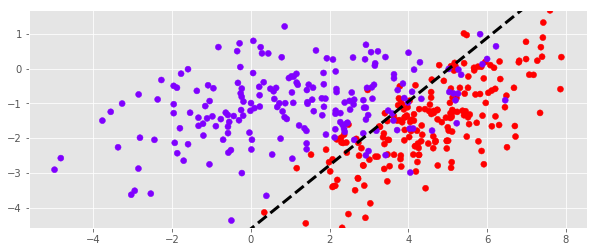

In [26]:
# Работает более менее
np.random.seed(0)
plt.figure(figsize=(10,4))
C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]
plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow')

model = LogReg(max_iter=10,  lambda_2 = 2 / 1e5, alpha=1, gd_type="stochastic")
model.fit(X, y)
W = model.weights

for (i, w) in enumerate(W):
    print('w_{} = {}'.format(i, w))

x = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
plt.plot(x, -(W[0] + W[1] * x) / W[2], 'k--', linewidth=3.0)
plt.ylim(X[:,1].min(), X[:,1].max())
plt.show()

In [27]:
X, y = make_classification(n_samples=10000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [28]:
# Метки 0-1, но в регресси преобразую их к -1, 1 
y[:10]

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

5it [13:13, 158.10s/it]


Text(0.5, 0, 'Epoch')

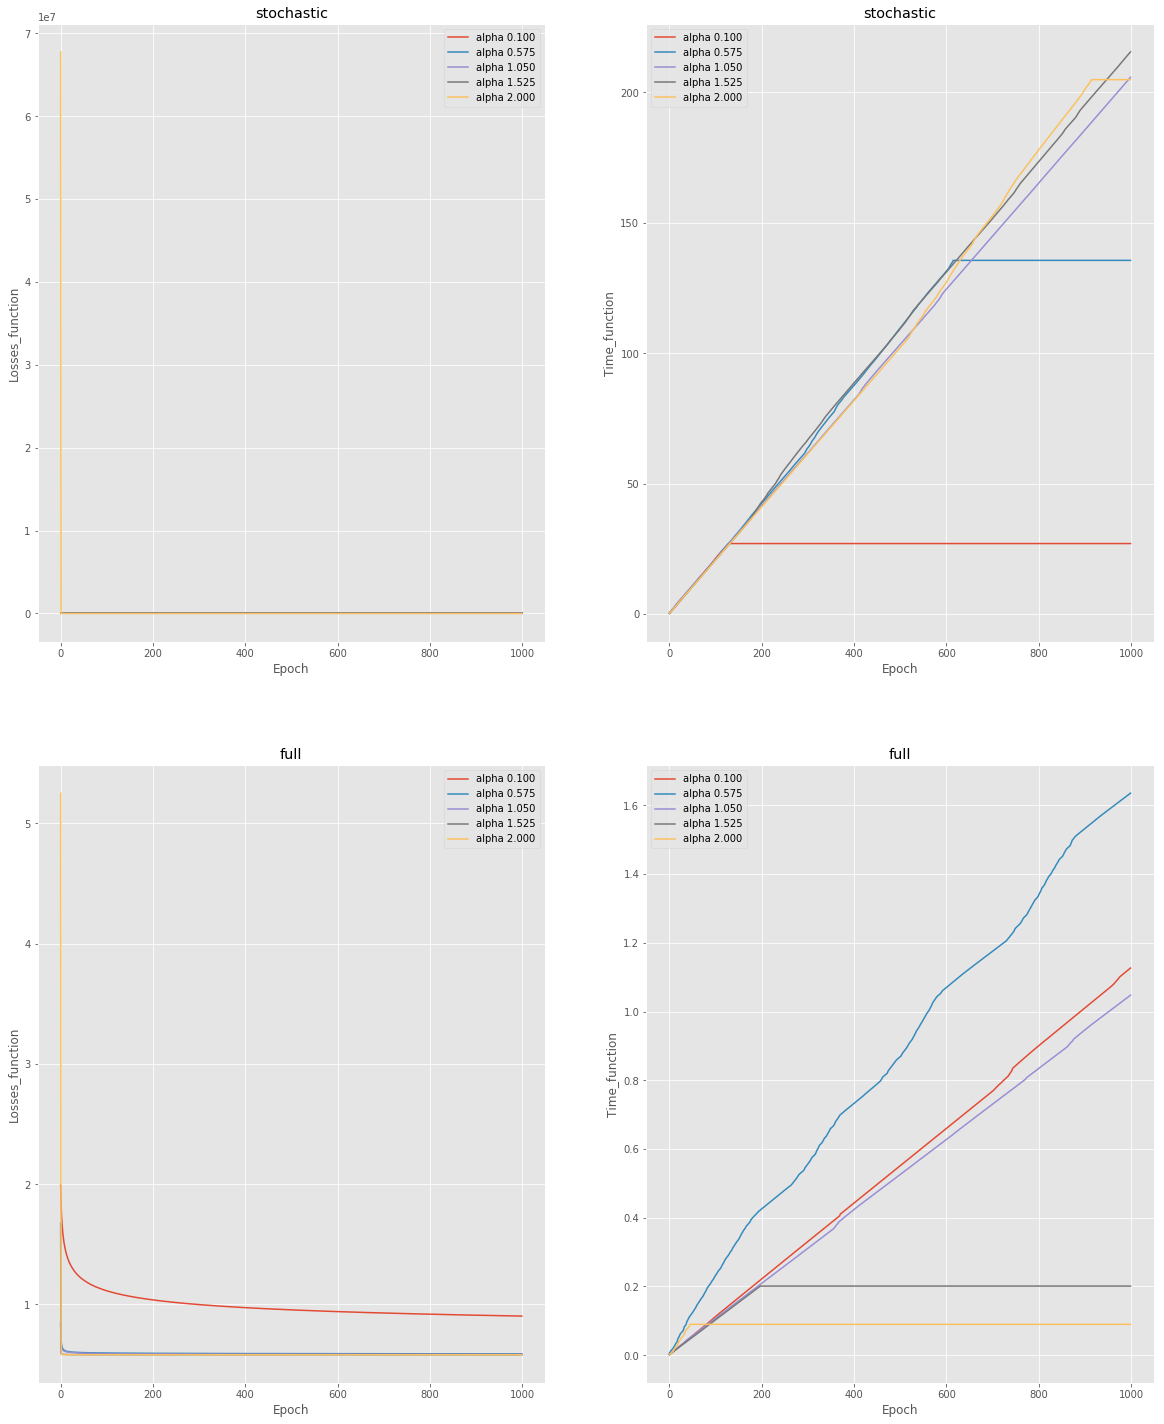

In [29]:
# Сходимость при разных alpha
plt.figure(figsize=(20, 25))
max_iter = 1000
costs_stochastic = {}
times_stochastic = {}
costs_full = {}
times_full = {}
for i, alpha in tqdm(enumerate(np.linspace(0.1, 2, num=5))):
    my_clf_stochastic = LogReg(max_iter=max_iter, alpha=alpha, 
                               gd_type = 'stochastic',tolerance=1e-6, 
                               lambda_2=1,loss_history=True, 
                               time_history=True).fit(X, y)
    my_clf_full = LogReg(max_iter=max_iter, alpha=alpha, 
                         gd_type = 'full', tolerance=1e-6, 
                         lambda_2 = 1,loss_history=True, 
                         time_history=True).fit(X, y)
    
    costs_stochastic[alpha] = my_clf_stochastic.costs
    times_stochastic[alpha] = np.cumsum(my_clf_stochastic.times)
    costs_full[alpha] = my_clf_full.costs
    times_full[alpha] = np.cumsum(my_clf_full.times)
    

    
plt.subplot(221)

ax = plt.gca()
ax.set_title("stochastic")
for item in costs_stochastic.items():
    ax.plot(np.arange(max_iter), item[1], label='alpha {0:.3f}'.format(item[0]))
ax.legend()
ax.set_ylabel('Losses_function')
ax.set_xlabel('Epoch')
plt.subplot(222)

ax = plt.gca()
ax.set_title("stochastic")
for item in times_stochastic.items():
    ax.plot(np.arange(max_iter), item[1], label='alpha {0:.3f}'.format(item[0]))
ax.legend()
ax.set_ylabel('Time_function')
ax.set_xlabel('Epoch')
plt.subplot(223)
ax = plt.gca()
ax.set_title("full")
for item in costs_full.items():
    ax.plot(np.arange(max_iter), item[1], label='alpha {0:.3f}'.format(item[0]))
ax.legend()
ax.set_ylabel('Losses_function')
ax.set_xlabel('Epoch')
plt.subplot(224)
ax = plt.gca()
ax.set_title("full")

for item in times_full.items():
    ax.plot(np.arange(max_iter), item[1], label='alpha {0:.3f}'.format(item[0]))
ax.legend()
ax.set_ylabel('Time_function')
ax.set_xlabel('Epoch')

__Выводы:__ Получил, что полный спуск работает быстрее стохастического, но и данные у нас не большие(все помещаются в оперативную память), так что тут вполне понятно, что легкче в Numpy Один раз посчитать градиент для всей матрици, чем для каждого семпла. Стохастический же сходится за меньшее количество итераций в большенстве случаев, при alpha = 2 он сошелся медленнее. Решил ещё попробовать некую середин с minibatch, результаты выводить не стал, но это действительно оптимально помоему, но надо подбирать размер батча, как доп параметр. 

__Задание 2.__ Обучение логистической регрессии на реальных данных и оценка качества классификации.

Полезные функции и классы из scikit-learn для этого задания: confusion_matrix, precision_recall_curve, average_precision_score, train_test_split, StandardScaler, roc-curve, roc_auc_score.

Возьмём данные конкурса [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом под нужды задания мы немного модифицируем датасет.

In [30]:
data = pd.read_csv('safe_drive_prediction/train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.

In [31]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.utils.fixes import signature
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
import itertools

Не забудьте отнормировать признаки (можно воспользоваться StandardScaler или сделать это вручную). Пока не будем обращать внимание на то, что некоторые признаки категориальные (этим мы займёмся позже).

In [33]:
X_train.shape

(100000, 57)

In [34]:
X_train.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
1049183,0,1,5,0,0,1,0,0,0,0,...,4,3,4,6,0,0,0,0,0,0
106872,1,1,3,1,0,0,1,0,0,0,...,9,0,4,12,0,1,1,0,0,0
28943,6,2,7,1,0,0,0,1,0,0,...,4,1,2,7,0,1,1,0,1,0
851826,1,1,5,1,0,0,0,1,0,0,...,6,2,2,10,0,0,1,0,0,0
934813,0,1,1,0,4,1,0,0,0,0,...,9,1,2,14,0,1,1,0,0,0


In [35]:
my_model = Pipeline([
    ('sclr', StandardScaler()),
    ('clf', LogReg(lambda_2 = 0.004, max_iter = 100, alpha = 1, minibatch_size=2048)),
    ])

In [36]:
model = Pipeline([
    ('sclr', StandardScaler()),
    ('clf', LogisticRegressionCV()),
    ])

Обучите логистическую регрессию с удобными для вас параметрами. Сделайте предсказание на тестовой части выборки.

In [37]:
# model.fit(X_train, y_train)
my_model.fit(X_train, y_train)

# y_pred =  model.predict(X_test)
y_pred =  my_model.predict_proba(X_test)[0]



/home/alexmal/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/alexmal/anaconda3/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/alexmal/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Постройку ROC-кривую и Precision-Recall-кривую, посчитайте ROC-AUC и PR-AUC. Какие наблюдения и выводы по ним можно сделать? (В свободной форме)

ROC-AUC: 0.624511


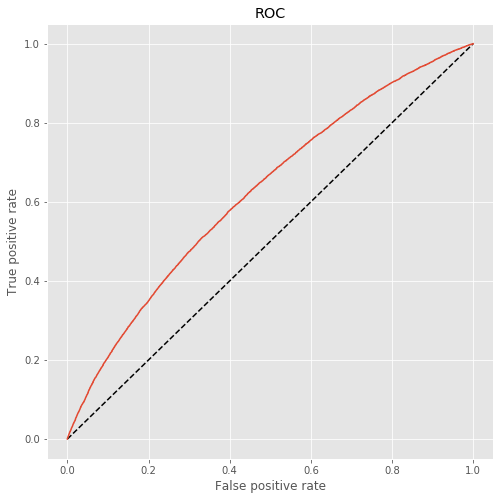

In [38]:
print('ROC-AUC: %f' % roc_auc_score(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.plot(fpr, tpr)
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.61')

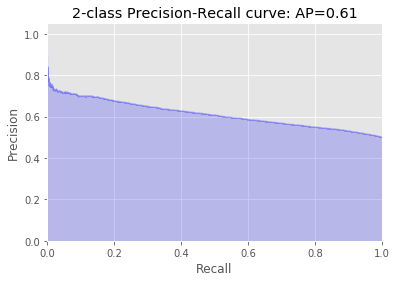

In [39]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

Предположим, что наш алгоритм должен обеспечивать полноту не менее 0.7. Какому порогу бинаризации вероятностей это будет соответствовать? Какую точность (precision) мы получим? Постройте матрицу ошибок для данного порога. Что вы можете сказать о таком алгоритме? (В свободной форме)

In [40]:
arg_tr = np.argwhere(recall >= 0.7)[-1][0] # Аргумент при котором перескочили порог recall 0.7
print("Точность при полноте 0.7 = ", precision[arg_tr])
threshold = thresholds[arg_tr] # Необходимый порог
print(threshold)

# Устанавливаем новую границу 
my_model.set_params(clf__threshold = threshold)
y_pred =  my_model.predict(X_test)

Точность при полноте 0.7 =  0.5677538641192403
0.45699374601536097


/home/alexmal/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Confusion matrix, without normalization
[[23343 26651]
 [15000 35006]]
Normalized confusion matrix
[[0.47 0.53]
 [0.3  0.7 ]]


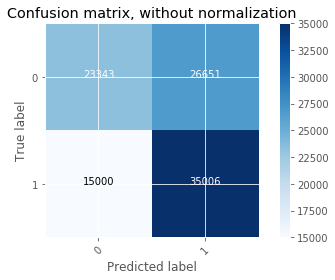

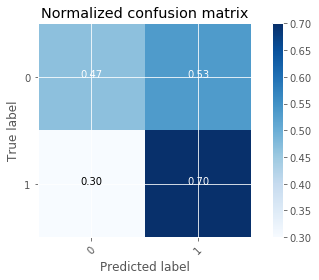

In [41]:
# Из sclearn
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

__Задание 3.__ Изучение влияния регуляризатора на процесс обучения

Проверьте на практике, как влияет регуляризатор на процесс обучения (убывание функции потерь на обучающей и отложенной выборках). Чтобы считать функцию потерь на отложенной выборке после каждой итерации, запускайте процесс обучения логистической регрессии с параметром $max\_iter=1$ и $w^{(0)}$, полученным на предыдущей итерации. Постройте два графика: на одном из них логистическая регрессия с коэффициентом регуляризации, равным 0, а на другом с некоторым разумным значением. На каждом графике одновременно должна быть и функция потерь для обучающей, и для тестовой выборки. Не забудьте сделать одинаковыми оси обоих графиков. Какие выводы вы можете сделать?

In [42]:
X_train_ = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test_ = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

In [43]:
import sys
from IPython.display import clear_output


In [44]:
def draw(X_train, y_train, X_test, y_test, max_iter = 10, alpha = 1, lambda_2 = 0.004, shuffle = True):
    
    loss_with_reg_train = np.zeros(max_iter)
    loss_without_reg_train = np.zeros(max_iter)
    loss_with_reg_test = np.zeros(max_iter)
    loss_without_reg_test = np.zeros(max_iter)
    
    log_reg_with = LogReg(lambda_2 = lambda_2, max_iter = 1, minibatch_size=2048, loss_history = True, shuffle = shuffle)
    log_reg_without = LogReg(lambda_2 = 0.0, max_iter = 1, minibatch_size=2048, loss_history = True, shuffle = shuffle)
    
    w0_with_reg_train = np.ones(X_train.shape[1] + 1)
    w0_whithout_train = np.ones(X_train.shape[1] + 1)
    w0_with_reg_test = np.ones(X_test.shape[1] + 1)
    w0_whithout_test = np.ones(X_test.shape[1] + 1)
    for epoch in range(max_iter):
        learning_rate = alpha / (epoch + 1)
        log_reg_with.set_params(alpha=learning_rate)
        log_reg_without.set_params(alpha=learning_rate)
        #Train
        log_reg_with.set_params(w0=w0_with_reg_train)
        log_reg_without.set_params(w0=w0_whithout_train)
        log_reg_with.fit(X_train, y_train)
        log_reg_without.fit(X_train, y_train)
        loss_with_reg_train[epoch] = (log_reg_with.costs[0])
        loss_without_reg_train[epoch] = (log_reg_without.costs[0])
        
        w0_with_reg_train = log_reg_with.weights
        w0_whithout_train = log_reg_without.weights
        
        # Test
        log_reg_with.set_params(w0=w0_with_reg_test)
        log_reg_without.set_params(w0=w0_whithout_test)
        
        loss_with_reg_test[epoch] = (log_reg_with.fit(X_test, y_test).costs[0])
        loss_without_reg_test[epoch] = (log_reg_without.fit(X_test, y_test).costs[0])
        
        w0_with_reg_test = log_reg_with.weights
        w0_whithout_test = log_reg_without.weights
        clear_output(True) 
        print('\rEpoch {0}... (Train/Test) Loss_with_reg: {1:.5f}/{2:.5f}\tLoss_without_reg: {3:.5f}/{4:.5f}\t'.format(
                        epoch + 1, loss_with_reg_train[-1], loss_with_reg_test[-1],
                        loss_without_reg_train[-1], loss_without_reg_test[-1]))
        plt.figure(figsize=(20, 6))
        plt.subplot(1, 2, 1)
        plt.title("With")
        plt.plot(loss_with_reg_train[:epoch], label='Train with reg')
        plt.plot(loss_with_reg_test[:epoch], label='Test with reg')
        plt.xlabel('Epochs', fontsize=16)
        plt.ylabel('Loss', fontsize=16)
        plt.legend(loc=0, fontsize=16)
        plt.grid('on')
        plt.subplot(1, 2, 2)
        plt.title("Without")
        plt.plot(loss_without_reg_train[:epoch], label='Train without reg')
        plt.plot(loss_without_reg_test[:epoch], label='Test without reg')
        plt.xlabel('Epochs', fontsize=16)
        plt.ylabel('Loss', fontsize=16)
        plt.legend(loc=0, fontsize=16)
        plt.grid('on')
        plt.show()
    return loss_with_reg_train, loss_with_reg_test, loss_without_reg_train, loss_without_reg_test
        

Epoch 15... (Train/Test) Loss_with_reg: 0.68394/0.68395	Loss_without_reg: 0.66819/0.66871	


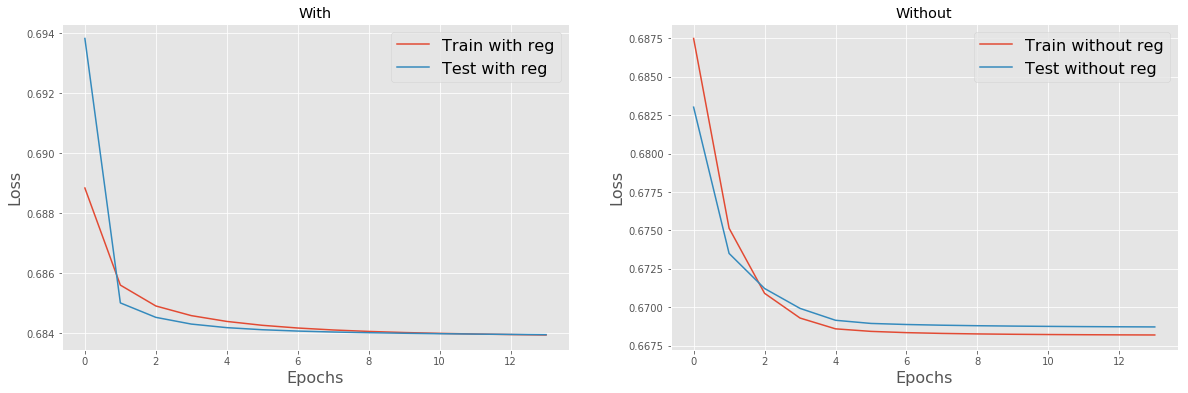

In [45]:
train_w, test_w, tr_w, te_w = draw(X_train_, y_train, X_test_, y_test, 15, lambda_2 = 1, shuffle=False)

In [46]:
# Вывод: на графике плохо видно, но мы с регуляризацией, получили чуть хуже значение функции потерь, 
# зато разница на train и на test намного меньше чем без регуляризации

## Часть 3. Метод опорных векторов

__Задание 1.__ Обучение и применение метода опорных векторов.

Обучите метод опорных векторов (в этот раз воспользуйтесь готовой реализацией LinearSVC из sklearn). Используйте уже загруженные и обработанные в предыдущей части данные.

In [61]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

In [62]:
cclf = CalibratedClassifierCV(base_estimator=LinearSVC(max_iter = 1000), cv=3)
cclf.fit(X_train_, y_train)
res = cclf.predict_proba(X_test_)[:, 1]

/home/alexmal/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/alexmal/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/alexmal/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [63]:
y_pred = res

ROC-AUC: 0.624887


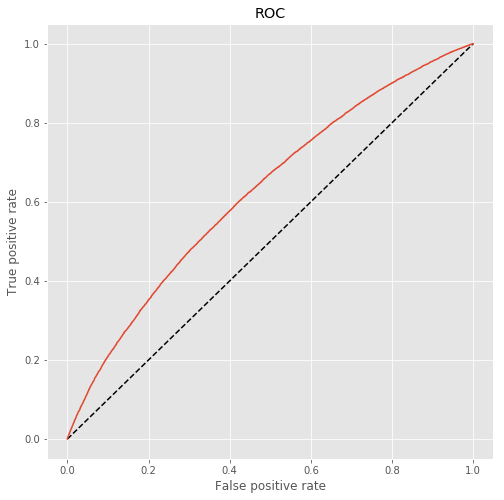

In [64]:
print('ROC-AUC: %f' % roc_auc_score(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.plot(fpr, tpr)
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.61')

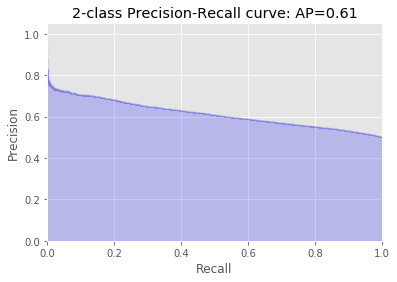

In [65]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

На той же тестовой части посчитайте все те же метрики. Что вы можете сказать о полученных результатах?

In [66]:
# Стало лучше, но совсем не значительно, возможно стоило ещё немного  с параеметрами поиграться.

В названии метода присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью make_classification с 2 признаками, обучите на нём метод опорных векторов с линейным ядром. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут support\_vectors\_). В этот раз вместо LinearSVC воспользуйтесь SVC с линейным ядром, так как только в нём есть информация об опорных векторах.

In [67]:
from sklearn.datasets.samples_generator import make_classification
from sklearn.svm import SVC
# Для кириллицы на графиках
# font = {'family': 'Verdana',
#         'weight': 'normal'}
# plt.rc('font', **font)
from ipywidgets import interact, IntSlider, fixed, FloatSlider


In [68]:
def plot_svc_decision_function(clf1, ax=None):
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    XX, YY = np.meshgrid(x, y)
    XY = np.c_[XX.ravel(), YY.ravel()]
    P1 = clf1.decision_function(XY)
    P1 = P1.reshape(XX.shape)
    
    # plot the margins
    cplot = ax.contour(XX, YY, P1, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    ax.clabel(cplot, inline=1, fontsize=10)

In [69]:
def lin_sep_svm_demo(class_sep=2):
    X, y = make_classification(n_samples=100, n_features=2, n_informative=2, class_sep=class_sep, scale=1,
                                n_redundant=0, n_clusters_per_class=1, random_state=31)

    lin_svm = SVC(kernel='linear', C=100).fit(X, y)
    
    
    plt.figure(figsize=(10,10))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap='autumn')
    plot_svc_decision_function(lin_svm)
    # plt.scatter(lin_svm.support_vectors_[:, 0], lin_svm.support_vectors_[:, 1],
    #        s=200, facecolors='none')
    
    
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    
    plt.xlim(-2, 5)
    plt.ylim(-3, 4)

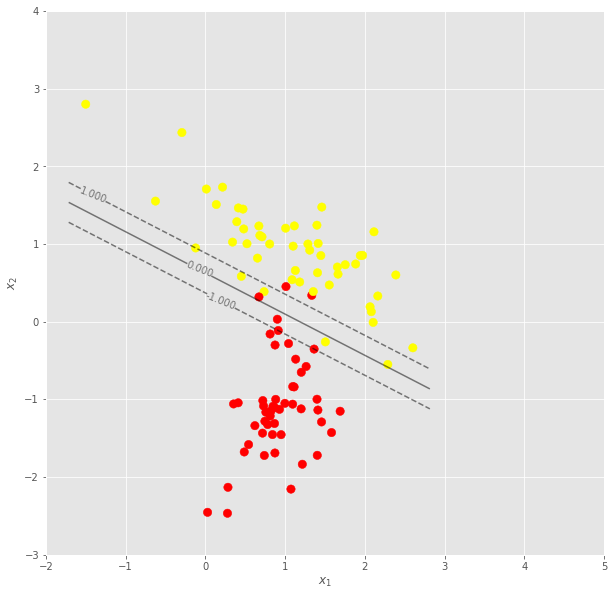

In [70]:
lin_sep_svm_demo(1)

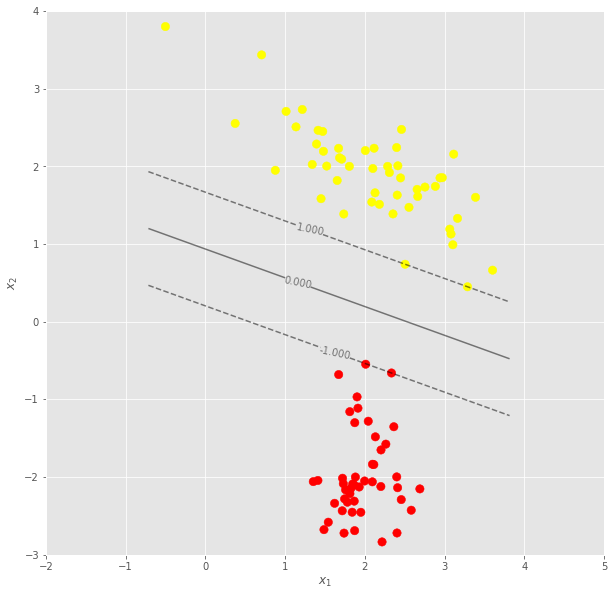

In [71]:
lin_sep_svm_demo(2)

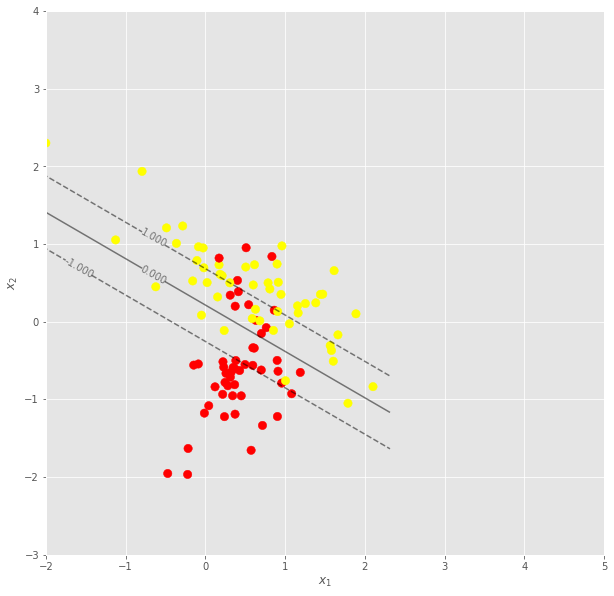

In [72]:
lin_sep_svm_demo(0.5)

## Часть 4. Работа с категориальными переменными

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

__Задание 1.__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было ранее). Измерьте время, потребовавшееся на обучение модели.

In [93]:
data = pd.read_csv('safe_drive_prediction/train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

In [94]:
X_train.shape

(100000, 57)

In [95]:
X_train.iloc[:10, 20: 35]

,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13
id,,,,,,,,,,,,,,,
1049183,0.868188,6,1,-1,0,0,1,1,1,0,1,91,2,0.417971,0.963540
106872,0.605702,11,1,-1,0,-1,4,1,1,2,1,104,2,0.316228,0.581765
28943,0.880341,10,0,-1,0,1,11,1,1,0,1,44,3,0.447214,0.719030
851826,-1.000000,5,1,0,2,1,1,1,1,2,1,1,0,0.374166,0.881349
934813,0.727582,9,1,0,0,0,7,1,1,1,1,92,3,0.374166,0.668012
1147039,-1.000000,11,0,1,9,1,11,1,1,1,1,56,3,0.600000,1.091742
978813,-1.000000,11,1,-1,0,-1,6,1,0,2,1,33,3,0.387298,0.944010
775504,0.449305,7,1,1,0,1,0,1,0,2,1,37,2,0.316228,0.875682
371031,-1.000000,2,1,-1,0,1,0,1,1,0,1,87,3,0.316228,0.713434


In [96]:
def one_hot_encode_df(df_data):
    drop = []
    for col in df_data.columns:
        if 'cat' in col:
            tmp = pd.get_dummies(df_data.loc[:, col],
                                 prefix=col,
                                 prefix_sep='=',
                                 drop_first=True
                                 )
            drop.append(col)
            df_data = pd.concat([df_data, tmp], axis=1)
    return df_data.drop(drop,axis=1)

In [97]:
X_train_one_hot = one_hot_encode_df(X_train)
X_test_one_hot = one_hot_encode_df(X_test)
X_train_one_hot = (X_train_one_hot - np.mean(X_train_one_hot, axis=0)) / np.std(X_train_one_hot, axis=0)
X_test_one_hot = (X_test_one_hot - np.mean(X_test_one_hot, axis=0)) / np.std(X_test_one_hot, axis=0)

In [98]:
X_train_one_hot.shape

(100000, 212)

In [99]:
X_train_one_hot.head()

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,...,ps_car_11_cat=95,ps_car_11_cat=96,ps_car_11_cat=97,ps_car_11_cat=98,ps_car_11_cat=99,ps_car_11_cat=100,ps_car_11_cat=101,ps_car_11_cat=102,ps_car_11_cat=103,ps_car_11_cat=104
id,,,,,,,,,,,,,,,,,,,,,
1049183,-0.992429,0.183242,1.359422,-0.643403,-0.465630,-0.465233,-0.021218,-0.042583,-0.106187,-0.032266,...,-0.071879,-0.056392,-0.05815,-0.066098,-0.132955,-0.096625,-0.112827,-0.057453,-0.192578,-0.433477
106872,-0.497237,-0.545544,-0.735607,1.554236,-0.465630,-0.465233,-0.021218,-0.042583,-0.106187,-0.032266,...,-0.071879,-0.056392,-0.05815,-0.066098,-0.132955,-0.096625,-0.112827,-0.057453,-0.192578,2.306927
28943,1.978723,0.912029,-0.735607,-0.643403,2.147627,-0.465233,-0.021218,-0.042583,-0.106187,-0.032266,...,-0.071879,-0.056392,-0.05815,-0.066098,-0.132955,-0.096625,-0.112827,-0.057453,-0.192578,-0.433477
851826,-0.497237,0.183242,-0.735607,-0.643403,2.147627,-0.465233,-0.021218,-0.042583,-0.106187,-0.032266,...,-0.071879,-0.056392,-0.05815,-0.066098,-0.132955,-0.096625,-0.112827,-0.057453,-0.192578,-0.433477
934813,-0.992429,-1.274331,1.359422,-0.643403,-0.465630,-0.465233,-0.021218,-0.042583,-0.106187,-0.032266,...,-0.071879,-0.056392,-0.05815,-0.066098,-0.132955,-0.096625,-0.112827,-0.057453,-0.192578,-0.433477


In [100]:
clf = LogReg(lambda_2 = 0.004, max_iter = 100, alpha = 1, minibatch_size=2048, time_history=True)


In [101]:
clf.fit(X_train_one_hot, y_train)
y_pred = clf.predict_proba(X_test_one_hot)[0]

In [102]:
print("Time(seconds) = ", np.cumsum(clf.times)[-1])

Time(seconds) =  10.017385005950928


ROC-AUC: 0.628504


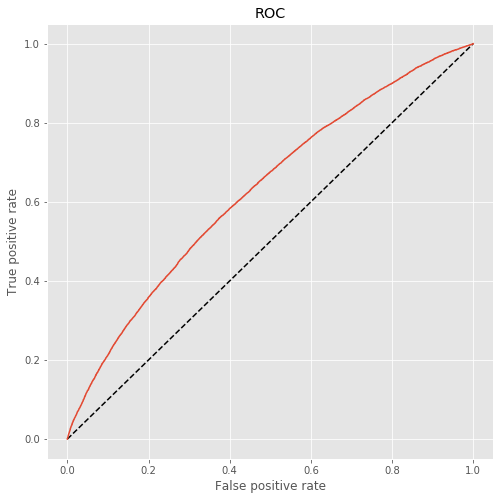

In [103]:
print('ROC-AUC: %f' % roc_auc_score(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.plot(fpr, tpr)
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.62')

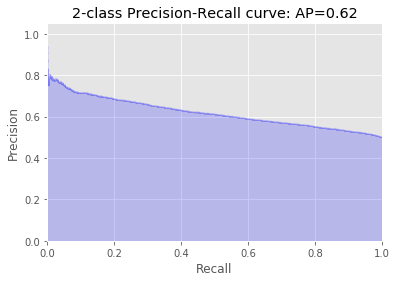

In [104]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

__Задание 2.__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Обучите логистическую регрессию и посмотрите на качество модели на тестовом множестве. Сравните время обучения с предыдущим экспериментов. Заметили ли вы что-то интересное?

In [85]:
data = pd.read_csv('safe_drive_prediction/train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

In [86]:
def count_encode_df(df_data, y):
    df_new = df_data.copy()
    for j, col in enumerate(df_data.columns):
        if 'cat' in col:
            values = df_data[col].values
            uniq, counts = np.unique(values, return_counts=True)
            y_values = y * values
            for i, cat in enumerate(uniq):
                arg = np.where(values == cat)[0]
                df_new.iloc[arg, j] = np.sum(y_values[arg]) / counts[i] 
    return df_new

In [87]:
X_train_counter = count_encode_df(X_train, y_train)
X_test_counter = count_encode_df(X_test, y_test)

In [88]:
X_train_counter.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
1049183,0,0.495424,5,0.000000,0.000000,1,0,0,0,0,...,4,3,4,6,0,0,0,0,0,0
106872,1,0.495424,3,0.516808,0.000000,0,1,0,0,0,...,9,0,4,12,0,1,1,0,0,0
28943,6,1.017265,7,0.516808,0.000000,0,0,1,0,0,...,4,1,2,7,0,1,1,0,1,0
851826,1,0.495424,5,0.516808,0.000000,0,0,1,0,0,...,6,2,2,10,0,0,1,0,0,0
934813,0,0.495424,1,0.000000,2.446982,1,0,0,0,0,...,9,1,2,14,0,1,1,0,0,0


In [89]:
X_train_counter = (X_train_counter - np.mean(X_train_counter, axis=0)) / np.std(X_train_counter, axis=0)
X_test_counter = (X_test_counter - np.mean(X_test_counter, axis=0)) / np.std(X_test_counter, axis=0)
clf = LogReg(lambda_2 = 0.004, max_iter = 100, alpha = 1, minibatch_size=2048, time_history=True)
clf.fit(X_train_counter, y_train)
y_pred = clf.predict_proba(X_test_counter)[0]
print("Time(seconds) = ", np.cumsum(clf.times)[-1])


Time(seconds) =  0.49720048904418945


ROC-AUC: 0.624603


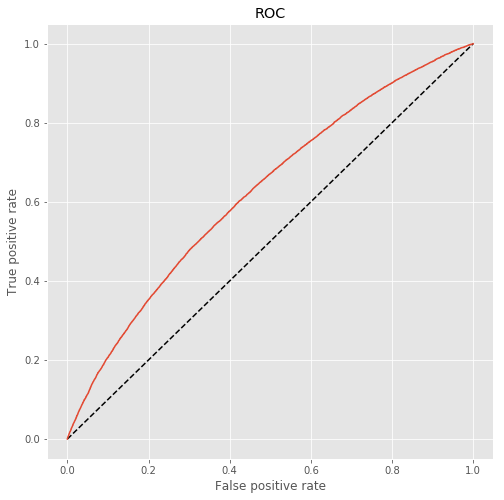

In [90]:
print('ROC-AUC: %f' % roc_auc_score(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.plot(fpr, tpr)
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.61')

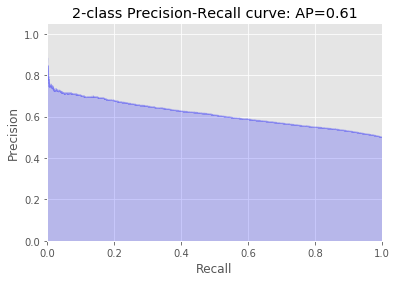

In [91]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [105]:
# Время в разы лучше, и скор хуже, но не совсем понял как с этим работать, веть чтобы сделать хорошие предсказания на test, нам же надо модифицировать признаки
# а мы не знаем y_test

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
- вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени)
- вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации)
- внесение некоторого шума в посчитанные признаки. 

## Часть 5 (бонус). Vowpal Wabbit

В этой части мы научимся использовать библиотеку [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit). У неё есть несколько особенностей:
- можно обучать только линейные модели, но за счёт большого количества опций и возможностей по усложнению, можно построить и довольно сложные вещи
- можно обучаться на выборках, которые не помещаются в оперативную память
- можно обрабатывать большое количество признаков (например, мешки слов текстов) и "на ходу" строить на них комбинации (не переделывать датасет)
- другие особенности, как например, активное обучение и возможность распараллеленного обучения.

Основные особенности при использовании следующие:
- Свой формат данных: "label |A feature1:value1 |B feature2:value2", позволяющий, во-первых, указывать не все признаки (не нужно хранить много нулей в разреженных данных), а во-вторых, группировать и иметь возможность отключать или взаимодействовать ("отключать", добавлять квадратичные признаки и т.д.) сразу со всей группой признаков. По этой причине вам понадобится реализовать конвертер датасета и загрузку своих предсказаний, чтобы посчитать качество предсказаний.
- Запуск обучения из командной строки (однако можно запускать эти же команды из ноутбука).

В этот раз мы будем использовать данные с конкурса [Kaggle Avazu Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction) по предсказанию кликов (бинарная классификация). В обучающей выборке 40kk строк, так что у вас не должно быть желания загружать их в оперативную память. Предлагается взять первые 30kk строк в качестве обучающей выборке и оставшуюся часть для тестирования.

__Задание 1.__ Работа с vowpal wabbit. 

- Скачайте данные, разделите их на обучающую и тестовую выборки.
- Подготовьте функции для конвертирования датасета в формат vowpal wabbit и для загрузки предсказаний в ноутбук для подсчёта функционала.
- Сделайте простейшее решение на vowpal wabbit. Оцените качество.
- Изучите возможности и параметры vowpal wabbit. Поэксперементируйте. 
- Расскажите, что интересного вы узнали (какие-нибудь особенности, режимы работы, фишки, параметры).
- Удалось ли вам улучшить качество базовой модели? Насколько? Что ещё можно было бы попробовать?

В этом задании предусмотрены баллы за достижение ROC-AUC на отложенной выборки более 0.738

In [ ]:
# Вспомнил о дз, недавно, не успеваю потестить данную библиотечку